# Darts: Deep Forecasting

## 1. Darts API

In [74]:
import numpy as np
import pandas as pd
from darts import TimeSeries
from darts.models import AutoARIMA, ExponentialSmoothing
from darts.metrics import mape, mase, r2_score, mae

import seaborn as sns
import matplotlib.pyplot as plt
np.set_printoptions(precision=4, suppress=True)
plt.style.use(['seaborn', 'seaborn-whitegrid'])
%config InlineBackend.figure_format = 'retina'

### 1.1. Time series container
[`TimeSeries`] is the main data class in Darts. There can be various instaniation ways, but it is recommended to do this *indirectly* from a Pandas dataframe with [`DatetimeIndex`] for easy data cleaning.

[`TimeSeries`]: https://unit8co.github.io/darts/generated_api/darts.timeseries.html
[`DatetimeIndex`]: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.html

In [75]:
dfEco = (
    pd.read_csv('../data/macroeconomic.csv')
    .select_columns
    .astype({'period': 'datetime64'})
    .set_index('period')
    .asfreq('QS')
)
tsEco = TimeSeries.from_dataframe(dfEco)

In [80]:
dfEco.head()

,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
period,,,,,,,,,,,,
1959-01-01,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1959-04-01,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
1959-07-01,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
1959-10-01,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
1960-01-01,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


#### Basic methods

In [39]:
tsEco.dtype

dtype('float64')

In [40]:
tsEco.freq

<QuarterBegin: startingMonth=1>

In [41]:
tsEco.columns

Index(['realgdp', 'realcons', 'realinv', 'realgovt', 'realdpi', 'cpi', 'm1',
       'tbilrate', 'unemp', 'pop', 'infl', 'realint'],
      dtype='object', name='component')

In [60]:
tsEco.n_components

12

In [64]:
tsEco.n_timesteps

203

In [65]:
tsEco.duration

Timedelta('18444 days 00:00:00')

#### Slicing

In [84]:
tsEco['realgdp'].head()

<TimeSeries (DataArray) (period: 5, component: 1, sample: 1)>
array([[[2710.349]],

       [[2778.801]],

       [[2775.488]],

       [[2785.204]],

       [[2847.699]]])
Coordinates:
  * period     (period) datetime64[ns] 1959-01-01 1959-04-01 ... 1960-01-01
  * component  (component) object 'realgdp'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

In [86]:
tsEco[['realgdp', 'realcons']].head(3)

<TimeSeries (DataArray) (period: 3, component: 2, sample: 1)>
array([[[2710.349],
        [1707.4  ]],

       [[2778.801],
        [1733.7  ]],

       [[2775.488],
        [1751.8  ]]])
Coordinates:
  * period     (period) datetime64[ns] 1959-01-01 1959-04-01 1959-07-01
  * component  (component) object 'realgdp' 'realcons'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

In [90]:
pd.date_range(start='1959-01-01', end='1960-01-01', freq='QS')

DatetimeIndex(['1959-01-01', '1959-04-01', '1959-07-01', '1959-10-01',
               '1960-01-01'],
              dtype='datetime64[ns]', freq='QS-JAN')

In [92]:
tsEco[pd.date_range(start='1959-01-01', end='1960-01-01', freq='QS')]

<TimeSeries (DataArray) (period: 5, component: 12, sample: 1)>
array([[[2710.349],
        [1707.4  ],
        [ 286.898],
        [ 470.045],
        [1886.9  ],
        [  28.98 ],
        [ 139.7  ],
        [   2.82 ],
        [   5.8  ],
        [ 177.146],
        [   0.   ],
        [   0.   ]],

       [[2778.801],
        [1733.7  ],
        [ 310.859],
        [ 481.301],
        [1919.7  ],
        [  29.15 ],
        [ 141.7  ],
...
        [  29.37 ],
        [ 140.   ],
        [   4.33 ],
        [   5.6  ],
        [ 179.386],
        [   0.27 ],
        [   4.06 ]],

       [[2847.699],
        [1770.5  ],
        [ 331.722],
        [ 462.199],
        [1955.5  ],
        [  29.54 ],
        [ 139.6  ],
        [   3.5  ],
        [   5.2  ],
        [ 180.007],
        [   2.31 ],
        [   1.19 ]]])
Coordinates:
  * period     (period) datetime64[ns] 1959-01-01 1959-04-01 ... 1960-01-01
  * component  (component) object 'realgdp' 'realcons' ... 'infl' 'realint'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

In [72]:
tsEco[pd.to_datetime('1959-01-01')]

<TimeSeries (DataArray) (period: 1, component: 12, sample: 1)>
array([[[2710.349],
        [1707.4  ],
        [ 286.898],
        [ 470.045],
        [1886.9  ],
        [  28.98 ],
        [ 139.7  ],
        [   2.82 ],
        [   5.8  ],
        [ 177.146],
        [   0.   ],
        [   0.   ]]])
Coordinates:
  * period     (period) datetime64[ns] 1959-01-01
  * component  (component) object 'realgdp' 'realcons' ... 'infl' 'realint'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

In [69]:
tsEco[0:5]

<TimeSeries (DataArray) (period: 5, component: 12, sample: 1)>
array([[[2710.349],
        [1707.4  ],
        [ 286.898],
        [ 470.045],
        [1886.9  ],
        [  28.98 ],
        [ 139.7  ],
        [   2.82 ],
        [   5.8  ],
        [ 177.146],
        [   0.   ],
        [   0.   ]],

       [[2778.801],
        [1733.7  ],
        [ 310.859],
        [ 481.301],
        [1919.7  ],
        [  29.15 ],
        [ 141.7  ],
...
        [  29.37 ],
        [ 140.   ],
        [   4.33 ],
        [   5.6  ],
        [ 179.386],
        [   0.27 ],
        [   4.06 ]],

       [[2847.699],
        [1770.5  ],
        [ 331.722],
        [ 462.199],
        [1955.5  ],
        [  29.54 ],
        [ 139.6  ],
        [   3.5  ],
        [   5.2  ],
        [ 180.007],
        [   2.31 ],
        [   1.19 ]]])
Coordinates:
  * period     (period) datetime64[ns] 1959-01-01 1959-04-01 ... 1960-01-01
  * component  (component) object 'realgdp' 'realcons' ... 'infl' 'realint'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

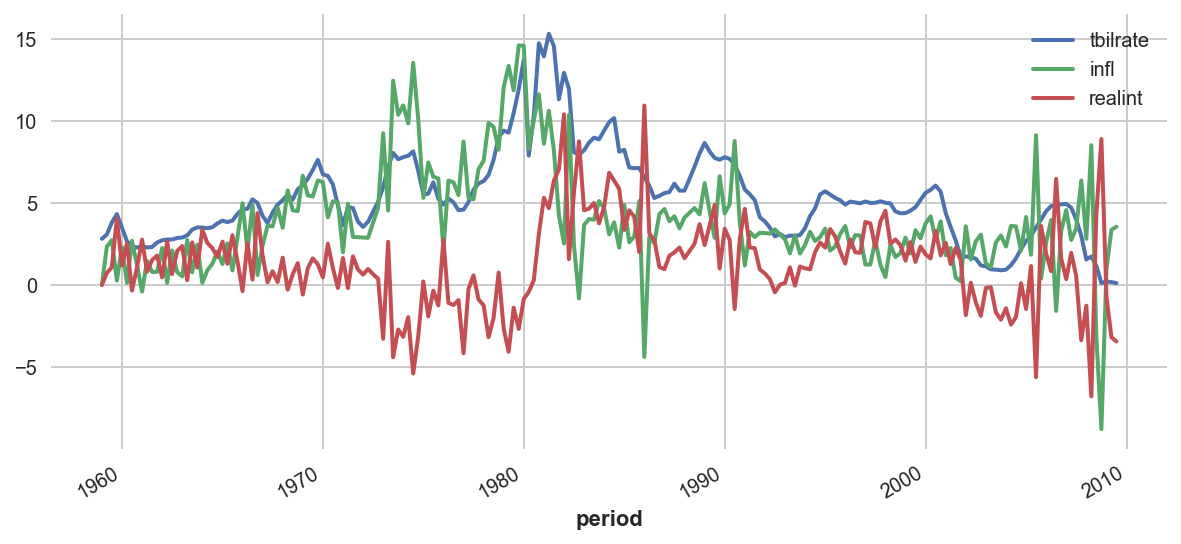

In [53]:
fig, ax = plt.subplots(figsize=(10,4))
tsEco[['tbilrate', 'infl', 'realint']].plot(ax=ax)

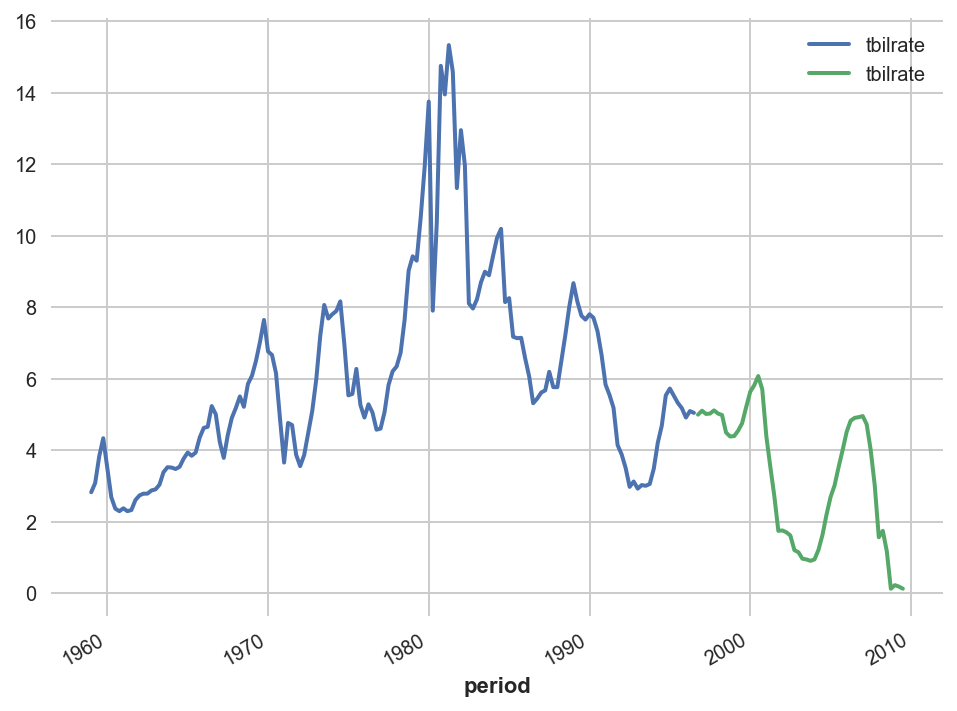

In [58]:
tsEco1, tsEco2 = tsEco['tbilrate'].split_before(0.75)
tsEco1.plot()
tsEco2.plot()

In [ ]:
tsEco[['tbilrate', 'infl', 'realint']].plot

### 1.2. Data transformation

### 1.3. Forecasting

### 1.4. Covariates

### 1.5. Backtesting

## 2. Deep forecasters

### 2.1. DeepAR
- API: [`BlockRNNModel`]
- Year: 2017
- Paper: https://arxiv.org/abs/1704.04110

[`BlockRNNModel`]: https://unit8co.github.io/darts/generated_api/darts.models.forecasting.block_rnn_model.html

### 2.2. Transformer
- API: [`TransformerModel`]
- Year: 2017
- Paper: https://arxiv.org/abs/1706.03762

[`TransformerModel`]: https://unit8co.github.io/darts/generated_api/darts.models.forecasting.transformer_model.html

### 2.3. N-BEATS
- API: [`NBEATSModel`]
- Year: 2019
- Paper: https://arxiv.org/abs/1905.10437

>

- API: [`NHiTSModel`]
- Year: 2022
- Paper: https://arxiv.org/abs/2201.12886


[`NBEATSModel`]: https://unit8co.github.io/darts/generated_api/darts.models.forecasting.nbeats.html
[`NHiTSModel`]: https://unit8co.github.io/darts/generated_api/darts.models.forecasting.nhits.html

### 2.4. TCN
- API: [`TCNModel`]
- Year: 2019
- Paper: https://arxiv.org/abs/1906.04397

[`TCNModel`]: https://unit8co.github.io/darts/generated_api/darts.models.forecasting.tcn_model.html

### 2.5. TFT
- API: [`TFTModel`]
- Year: 2019
- Paper: https://arxiv.org/abs/1912.09363

[`TFTModel`]: https://unit8co.github.io/darts/generated_api/darts.models.forecasting.tft_model.html#id1

### 2.6. LTSF-Linear
- API: [`DLinearModel`], [`NLinearModel`]
- Year: 2022
- Paper: https://arxiv.org/abs/2205.13504

[`DLinearModel`]: https://unit8co.github.io/darts/generated_api/darts.models.forecasting.dlinear.html
[`NLinearModel`]: https://unit8co.github.io/darts/generated_api/darts.models.forecasting.nlinear.html